Start with installation of all packages needed

In [ ]:
%pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=991682b9b96632e33173fb7f82fd3c9ece39fc3667f256357cba9ee18d29d303
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=3612332e454f0e889dc55714d863ff8ebc7ed1cc27b20903c6ab91e58da8f241
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd

In [ ]:
%pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.7 MB/s eta 0:00:00


In [ ]:
%pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.0 MB/s eta 0:00:00


In [ ]:
%pip install anndata

In [ ]:
%pip install keras

In [ ]:
%pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039142 sha256=da93b324545d885e20dcb238b02af57aaaa5aa5f457ae5aff34c6cfa3a0a259c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


Begin with download of csv files of count matrices corresponding to Short Root plants and Wild Type plants' single cell RNA data

In [ ]:
import scanpy, anndata

In [ ]:
!wget -O - https://zenodo.org/record/4597857/files/GSE123818_Root_single_cell_shr_datamatrix.fixednames.transposed.csv.gz | gunzip -c > shr.csv
!wget -O - https://zenodo.org/record/4597857/files/GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz | gunzip -c > wt.csv

--2023-12-02 22:10:27--  https://zenodo.org/record/4597857/files/GSE123818_Root_single_cell_shr_datamatrix.fixednames.transposed.csv.gz
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/4597857/files/GSE123818_Root_single_cell_shr_datamatrix.fixednames.transposed.csv.gz [following]
--2023-12-02 22:10:27--  https://zenodo.org/records/4597857/files/GSE123818_Root_single_cell_shr_datamatrix.fixednames.transposed.csv.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 5594225 (5.3M) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   5.33M  3.81MB/s    in 1.4s    

2023-12-02 22:10:29 (3.81 MB/s) - written to stdout [5594225/5594225]

--2023-12-02 22:10:29--  https://zenodo.org/record/4597857/files/GSE123818_Root_sing

Information about the number of features and observations in the dataset.

In [ ]:
with open('shr.csv', 'r') as csv:
     first_line = csv.readline()

ncol = first_line.count(',') + 1
print(ncol)
with open('wt.csv', 'r') as csv:
     first_line = csv.readline()

ncol = first_line.count(',') + 1
print("Number of variables", ncol)

27630
Number of variables 27630


In [ ]:
shr_ann = scanpy.read_csv('shr.csv', delimiter=',', first_column_names=True)
wt_ann = scanpy.read_csv('wt.csv', delimiter=',', first_column_names=True)

In [ ]:
print(shr_ann.obs)
print(wt_ann.obs)
print(shr_ann.var)
print(wt_ann.var)

Empty DataFrame
Columns: []
Index: [AAACCTGCAGAGCCAA-1, AAACCTGGTCGCTTTC-1, AAACCTGTCAAGAAGT-1, AAACCTGTCATGTGGT-1, AAACGGGAGCCAACAG-1, AAACGGGGTTAGGGTG-1, AAACGGGTCGAGAACG-1, AAAGATGAGATGTCGG-1, AAAGATGAGGCTACGA-1, AAAGATGCACGGTAAG-1, AAAGATGTCCAAATGC-1, AAAGCAACACAGGCCT-1, AAAGCAACACTCAGGC-1, AAAGCAAGTCAGGACA-1, AAAGCAATCATCTGTT-1, AAAGTAGAGTGGGCTA-1, AAAGTAGCAGGTCGTC-1, AAAGTAGCAGTCTTCC-1, AAAGTAGGTCGCGGTT-1, AAAGTAGTCGACGGAA-1, AAATGCCAGTAATCCC-1, AAATGCCAGTATGACA-1, AACACGTAGAATGTTG-1, AACACGTGTCGTCTTC-1, AACACGTGTCTCGTTC-1, AACCGCGCAATGAAAC-1, AACCGCGCATGCTAGT-1, AACCGCGTCAACTCTT-1, AACGTTGGTGTTCTTT-1, AACTCAGGTTCCACGG-1, AACTCCCAGCGTAGTG-1, AACTCCCAGTTAAGTG-1, AACTCCCGTCAAACTC-1, AACTCTTAGTGAATTG-1, AACTCTTTCTCTAAGG-1, AACTGGTGTTACCAGT-1, AAGACCTTCCACGAAT-1, AAGCCGCAGTGAACGC-1, AAGCCGCCACAAGTAA-1, AAGCCGCGTTAGAACA-1, AAGCCGCGTTGTACAC-1, AAGGAGCAGTTCGATC-1, AAGGAGCCACCGAAAG-1, AAGGAGCTCGGCGCTA-1, AAGGCAGCATGTCTCC-1, AAGGCAGGTACAGTGG-1, AAGGTTCCAAGGTTTC-1, AAGGTTCCAAGTTCTG-1, AAGG

Concatenate the plant data with short root and wild type information

In [ ]:
plant_data = shr_ann.concatenate(wt_ann)

<ipython-input-15-0b4463eac0a1>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plant_data = shr_ann.concatenate(wt_ann)


Now, we can see the new total number of observations.

In [ ]:
plant_data.rename_categories('batch', ['shr', 'wt'])
print(plant_data.obs)

                     batch
AAACCTGCAGAGCCAA-1-0   shr
AAACCTGGTCGCTTTC-1-0   shr
AAACCTGTCAAGAAGT-1-0   shr
AAACCTGTCATGTGGT-1-0   shr
AAACGGGAGCCAACAG-1-0   shr
...                    ...
TTTGTCACACTGTTAG-2-1    wt
TTTGTCACATCCTTGC-2-1    wt
TTTGTCAGTTGTCTTT-2-1    wt
TTTGTCATCACCGTAA-2-1    wt
TTTGTCATCGAATCCA-2-1    wt

[5826 rows x 1 columns]


Let's take some time to observe qualities of the data.

In [ ]:
scanpy.pp.calculate_qc_metrics(plant_data)

(                      n_genes_by_counts  log1p_n_genes_by_counts  \
 AAACCTGCAGAGCCAA-1-0               1860                 7.528869   
 AAACCTGGTCGCTTTC-1-0               6564                 8.789508   
 AAACCTGTCAAGAAGT-1-0               5483                 8.609590   
 AAACCTGTCATGTGGT-1-0                733                 6.598509   
 AAACGGGAGCCAACAG-1-0               3710                 8.219057   
 ...                                 ...                      ...   
 TTTGTCACACTGTTAG-2-1               3880                 8.263848   
 TTTGTCACATCCTTGC-2-1               3784                 8.238801   
 TTTGTCAGTTGTCTTT-2-1               5600                 8.630700   
 TTTGTCATCACCGTAA-2-1               5664                 8.642062   
 TTTGTCATCGAATCCA-2-1               3582                 8.183956   
 
                       total_counts  log1p_total_counts  \
 AAACCTGCAGAGCCAA-1-0        3772.0            8.235625   
 AAACCTGGTCGCTTTC-1-0       42823.0           10.664

We can see that there are cells with vars / genes with no cells by count!

There's also large variance in the number of cells by count and even in the number of genes by count.

This can also be visualized by looking at the violin plot distribution of the data grouped by batch.

In [ ]:
scanpy.pp.calculate_qc_metrics(plant_data, inplace=True)

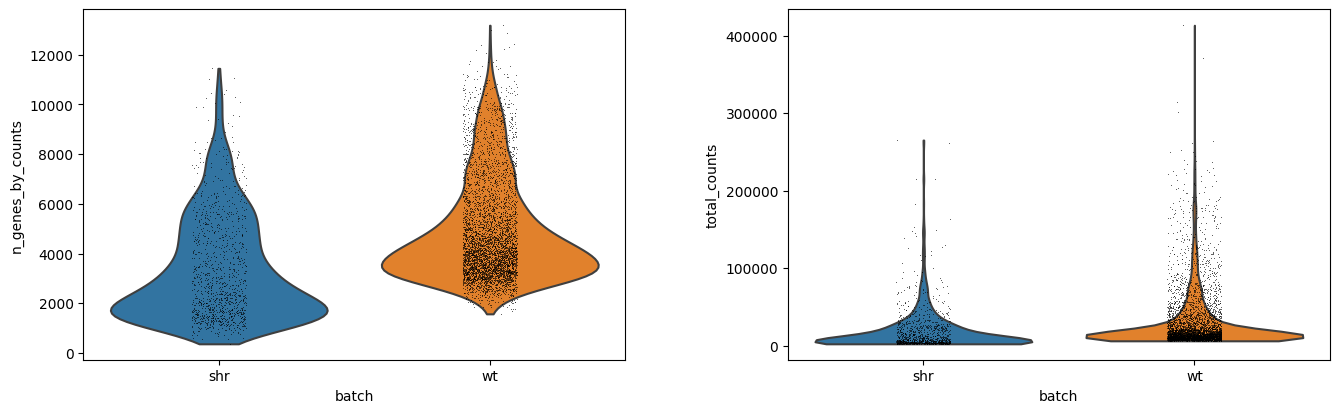

In [ ]:
scanpy.pl.violin(plant_data, ['n_genes_by_counts', 'total_counts'], groupby='batch', size=0.5, multi_panel=True)

We must preprocess the data due to these qualities. Some of the target approaches establishing a minimum number of genes and a minimum number of cells. Other approaches utilize restricting the number of genes by counts and the total counts to a maximum value.

In [ ]:
scanpy.pp.filter_cells(plant_data, min_genes=100)

In [ ]:
scanpy.pp.filter_genes(plant_data, min_cells=2)

In [ ]:
plant_data = plant_data[plant_data.obs['n_genes_by_counts'] < 12000]

In [ ]:
plant_data = plant_data[plant_data.obs['total_counts'] < 120000]

These are the dimensions of our final pre-processed data, at least before dimension reduction techniques.

In [ ]:
plant_data

View of AnnData object with n_obs × n_vars = 5623 × 23102
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'batch_colors'

In [ ]:
# Save the raw data in case it's usable later
plant_data.raw = plant_data

Additional steps taken to normalize and produce data that is compatible and with a reasonable distribution.

In [ ]:
scanpy.pp.normalize_total(plant_data, target_sum=10000.0, exclude_highly_expressed=False)

In [ ]:
scanpy.pp.log1p(plant_data)

In [ ]:
scanpy.pp.regress_out(plant_data, 'total_counts')

In [ ]:
scanpy.pp.scale(plant_data, max_value=10.0)

Now we can use the tools module to conduct pca, neighbor sensing, and UMAP. These are important commands in order to represent the full data in a lower dimensional space, even if we provide the full data for our initial clustering assignments.

In [ ]:
scanpy.tl.pca(plant_data)

In [ ]:
scanpy.pp.neighbors(plant_data, n_neighbors=10, n_pcs = 40)

In [ ]:
scanpy.tl.umap(plant_data)

Reiteration of showing that batch (Wild-Type vs Short Root) is not a causative agent of separation and thus the two datasets can be combined.

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


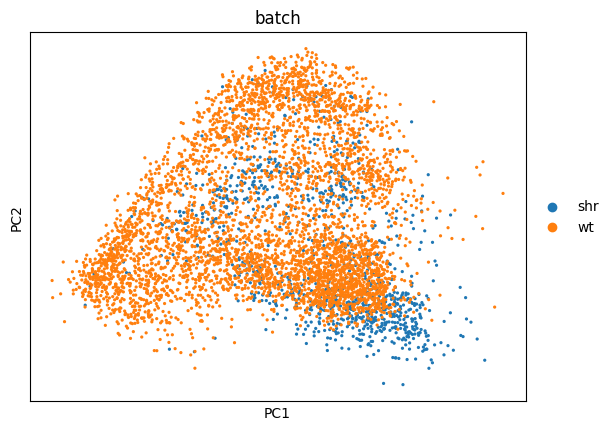

In [ ]:
scanpy.pl.pca(plant_data, color='batch')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


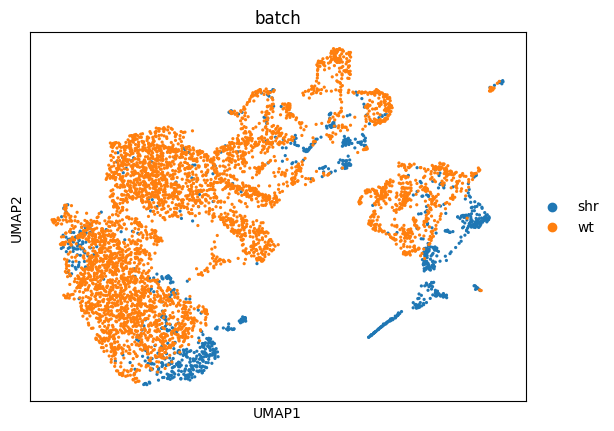

In [ ]:
scanpy.pl.umap(plant_data, color='batch')

Computation of leiden and louvain clusters to show a reasonable state-of-the-art evaluation of clustering to discover groups of cell types. Most clusters correspond to a separate cell type.

In [ ]:
scanpy.tl.leiden(plant_data, resolution=0.35)

In [ ]:
scanpy.tl.louvain(plant_data, resolution=0.35)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


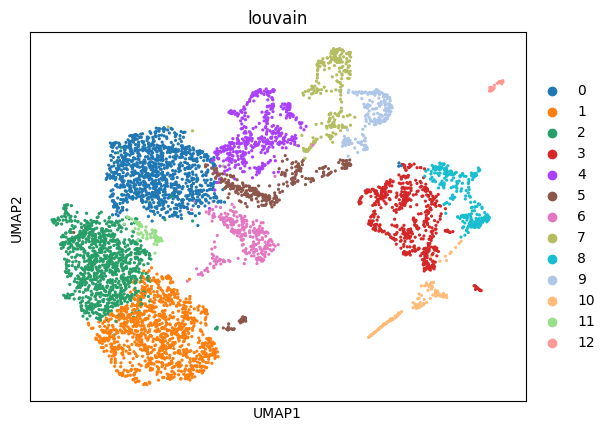

In [ ]:
scanpy.pl.umap(plant_data, color='louvain')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


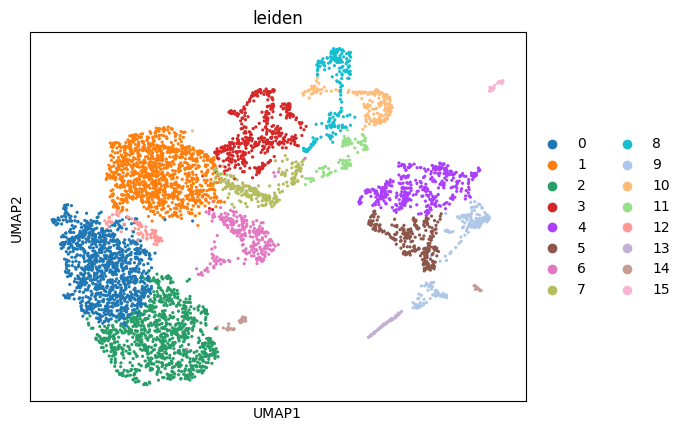

In [ ]:
scanpy.pl.umap(plant_data, color='leiden')

Installation of spark and Java.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .getOrCreate()

spark.conf.set("spark.sql.repl.eagerEval.enabled", True)  # Property used to format output tables better\
sc = spark.sparkContext

Importing of keras and pyspark libraries for Autoencoder architecture and data structures needed for Big-Data representations of common algorithms.

In [ ]:
import keras
from keras import layers
from keras import optimizers, regularizers
from random import sample, choice
from pyspark.ml.linalg import Vectors, VectorUDT, Vector, Matrices, Matrix
from pyspark.mllib.linalg.distributed import CoordinateMatrix, MatrixEntry
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Here's where we set some of the parameters needed for the construction and fitting of the autoencoder we plan on using.

In [ ]:
# Setting of parameters for the autoencoder
max_random_projection = 2048
encoded_dim = 2
hidden_dim1 = 128
hidden_dim2 = 16
lr = 0.001
bs = 32
num_epochs = 100
scale = False

In [ ]:
input_data = keras.Input(shape=(max_random_projection,))
hidden_prior = layers.Dense(hidden_dim1, activation='relu')(input_data)
hidden_prior2 = layers.Dense(hidden_dim2, activation='relu')(hidden_prior)
encoded = layers.Dense(encoded_dim, activation='relu')(hidden_prior2) #, activity_regularizer=regularizers.l1(1e-4)
hidden_post = layers.Dense(hidden_dim2, activation='relu')(encoded)
hidden_post2 = layers.Dense(hidden_dim1, activation='relu')(hidden_post)
decoded = layers.Dense(max_random_projection, activation='relu')(hidden_post2)
autoencoder = keras.Model(input_data, decoded)

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2048)]            0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 16)                2064      
                                                                 
 dense_8 (Dense)             (None, 2)                 34        
                                                                 
 dense_9 (Dense)             (None, 16)                48        
                                                                 
 dense_10 (Dense)            (None, 128)               2176      
                                                                 
 dense_11 (Dense)            (None, 2048)              2641

In [ ]:
encoder = keras.Model(input_data, encoded)

In [ ]:
adam_optimizer = keras.optimizers.Adam(learning_rate = lr)
autoencoder.compile(optimizer=adam_optimizer, loss='mean_squared_error')

Extraction of 2048 data entries from plant data to use when fitting.

In [ ]:
plant_data_proj = plant_data[:, sample(range(plant_data.n_vars), 2048)]

In [ ]:
history = autoencoder.fit(plant_data_proj.X, plant_data_proj.X, batch_size=bs, epochs=num_epochs, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 4s 19ms/step - loss: 0.7878 - val_loss: 0.7278
Epoch 2/100
141/141 [==============================] - 2s 13ms/step - loss: 0.7792 - val_loss: 0.7238
Epoch 3/100
141/141 [==============================] - 2s 11ms/step - loss: 0.7759 - val_loss: 0.7208
Epoch 4/100
141/141 [==============================] - 2s 12ms/step - loss: 0.7732 - val_loss: 0.7193
Epoch 5/100
141/141 [==============================] - 2s 11ms/step - loss: 0.7712 - val_loss: 0.7185
Epoch 6/100
141/141 [==============================] - 2s 11ms/step - loss: 0.7697 - val_loss: 0.7177
Epoch 7/100
141/141 [==============================] - 2s 11ms/step - loss: 0.7680 - val_loss: 0.7172
Epoch 8/100
141/141 [==============================] - 2s 14ms/step - loss: 0.7663 - val_loss: 0.7160
Epoch 9/100
141/141 [==============================] - 2s 16ms/step - loss: 0.7649 - val_loss: 0.7153
Epoch 10/100
141/141 [==============================] - 2s 15ms/step - loss: 0.763

Encode the data for plotting to see if the latent space provides enough variation for visualization and eventual distinguishment of clusters.

In [ ]:
plant_data_pred = encoder.predict(plant_data_proj.X)

176/176 [==============================] - 1s 4ms/step


Based on the clusters from the diagrams below, it appears that the 2D autoencoder-generated space is sufficient to distinguish between reasonable clusterings made with higher dimensional data.

In [ ]:
leiden_colors_list = sample(list(mcolors.CSS4_COLORS.values()), len(plant_data.obs['leiden'].cat.categories))
louvain_colors_list = sample(list(mcolors.CSS4_COLORS.values()), len(plant_data.obs['louvain'].cat.categories))

Text(0.5, 1.0, 'Louvain Clusters in a 2D Autoencoder-generated latent space')

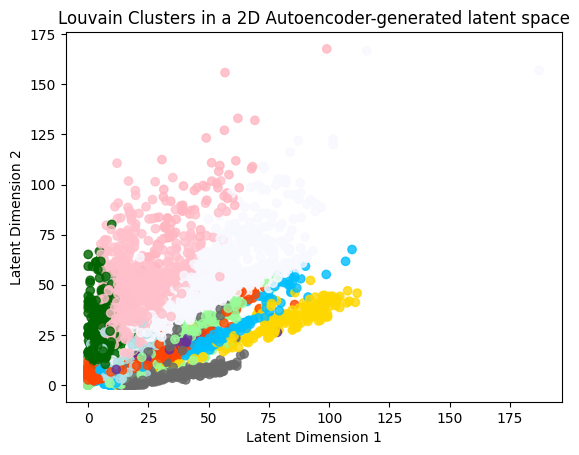

In [ ]:
plt.scatter(plant_data_pred[:, 0], plant_data_pred[:, 1], alpha=.8, c=[louvain_colors_list[int(x)] for x in plant_data.obs['louvain']])
plt.xlabel('Latent Dimension 1');
plt.ylabel('Latent Dimension 2');
plt.title('Louvain Clusters in a 2D Autoencoder-generated latent space')

Text(0.5, 1.0, 'Leiden Clusters in a 2D Autoencoder-generated latent space')

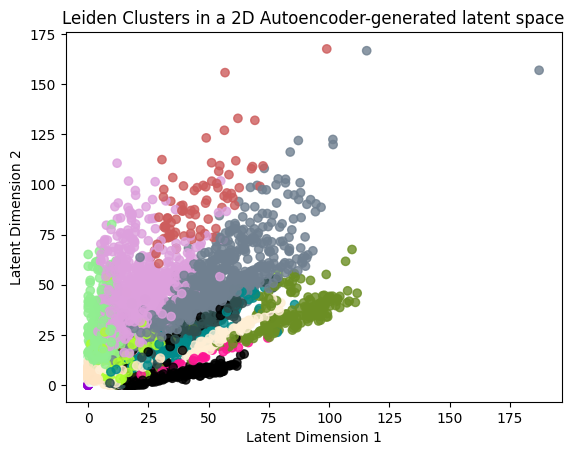

In [ ]:
plt.scatter(plant_data_pred[:, 0], plant_data_pred[:, 1], alpha=.8, c=[leiden_colors_list[int(x)] for x in plant_data.obs['leiden']])
plt.xlabel('Latent Dimension 1');
plt.ylabel('Latent Dimension 2');
plt.title('Leiden Clusters in a 2D Autoencoder-generated latent space')

Our implementation of K-means algorithm via PySpark

In [ ]:
import math

num_centers = 6

def euclidean_dist(x1, x2):
  return math.sqrt(Vectors.squared_distance(x1, x2))

def k_means(k, data, num_iter):
  # obtain a dense vector representation of our list of ndarrays
  data = list(map(Vectors.dense, data))
  # Parallelize the data
  data = sc.parallelize(data)
  # Initiate the first k cluster centroids
  centroids = data.takeSample(False, k)
  # Keep a record of previous centroids
  old_centroids = centroids.copy()
  for i in range(num_iter):
    # Calculate the distance of each observation to each k centroid
    distances_per_obs = data.map(lambda x: (x, [euclidean_dist(x, centroid) for centroid in centroids]))
    # Pick out the minimum distance as our cluster assignment
    assignment_per_obs = distances_per_obs.map(lambda x: (x[1].index(min(x[1])), x[0]))
    # keyless version of assignments_per_obs
    result = distances_per_obs.map(lambda x: x[1].index(min(x[1])))
    # Keep a count of how many observations are assigned to each cluster
    count_rdd = sc.parallelize(assignment_per_obs.countByKey().items())
    # Find the sum of the vectors in a group of observations
    sum_rdd = assignment_per_obs.reduceByKey(lambda x, y: x+y)
    # Calculate new centers as the average of each groups data point vectors.
    new_centers = sum_rdd.join(count_rdd).map(lambda x: (x[0], x[1][0]/x[1][1])).take(k)
    # Reassign cluster centers for reference in the next iteration
    for center_info in new_centers:
      centroids[center_info[0]] = center_info[1]
    # Check to see if centroids have changed; if not, continue
    if old_centroids == centroids:
      break
    # After the check, assign old_centroids to this to reference next iteration
    old_centroids = centroids.copy()

  return result.collect()

observation_cluster_vals = k_means(num_centers, plant_data_pred, 10)

In [ ]:
k_colors_list = sample(list(mcolors.CSS4_COLORS.values()), len(range(num_centers)))

We can also see that clustering done based off of the reduced 2D data struggles to capture those linear qualities present in the 'proper' separation of data points in the Autoencoder 2D latent space representation.

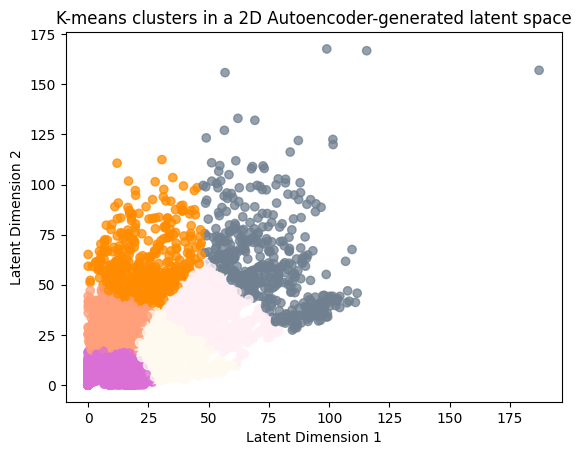

In [ ]:
plt.scatter(plant_data_pred[:, 0], plant_data_pred[:, 1], alpha=.75, c=[k_colors_list[x] for x in observation_cluster_vals])
plt.xlabel('Latent Dimension 1');
plt.ylabel('Latent Dimension 2');
plt.title("K-means clusters in a 2D Autoencoder-generated latent space");

We tried to repeat the experiment with another clustering algorithm, HDBScan's Robust Single Link Clustering, but it also struggled to capture those linear groups with a reduced dimension vector.

In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.RobustSingleLinkage(k=num_centers)
cluster_labels = clusterer.fit_predict(plant_data_pred)
hierarchy = clusterer.cluster_hierarchy_


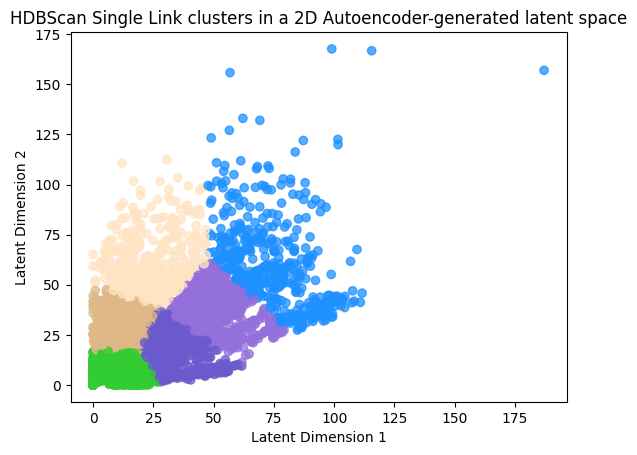

In [ ]:
plt.scatter(plant_data_pred[:, 0], plant_data_pred[:, 1], alpha=.75, c=[k_colors_list[x] if x > -1 else 'white' for x in observation_cluster_vals])
plt.xlabel('Latent Dimension 1');
plt.ylabel('Latent Dimension 2');
plt.title("HDBScan Single Link clusters in a 2D Autoencoder-generated latent space");